In [112]:
#step1 import data, import library
#install.packages("fitdistrplus", type = "source")
library(fitdistrplus)
data <- read.csv("D:/Files/jupytercode/orcoursework/ATMData.csv")
head(data)

CustomerNumber,Inter.arrival.time.minutes.,waiting.time,service.time.minutes.,waiting.time.for.counter.table,service.time.for.counter.table,X,X.1,X.2
C1,1.50,0,0.50,15,16.00,NA,NA,NA
C2,3.50,0,0.50,7,26.00,NA,NA,NA
C3,1.83,0,1.50,17,28.33,NA,NA,NA
C4,3.33,0,0.33,12,28.08,NA,NA,NA
C5,4.33,0,0.42,15,27.00,NA,NA,NA
C6,3.50,0,0.62,2,7.83,NA,NA,NA


ERROR: Error in fitdist(): 缺少参数"distr",也没有缺省值


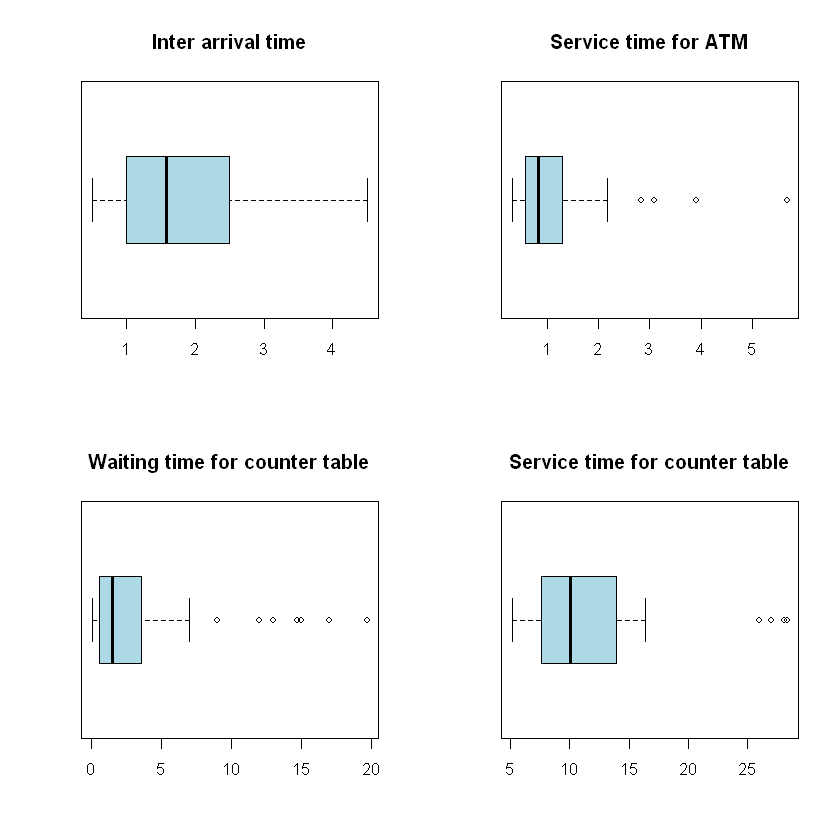

In [113]:
#step2 Raw data analysis
par(mfrow=c(2,2))
boxplot(data$Inter.arrival.time.minutes., horizontal = TRUE, main = "Inter arrival time", col = "lightblue", border = "black")
#boxplot(data$waiting.time, horizontal = TRUE, main = "waiting.time", col = "lightblue", border = "black")
boxplot(data$service.time.minutes., horizontal = TRUE, main = "Service time for ATM", col = "lightblue", border = "black")
boxplot(data$waiting.time.for.counter.table, horizontal = TRUE, main = "Waiting time for counter table", col = "lightblue", border = "black")
boxplot(data$service.time.for.counter.table, horizontal = TRUE, main = "Service time for counter table", col = "lightblue", border = "black")



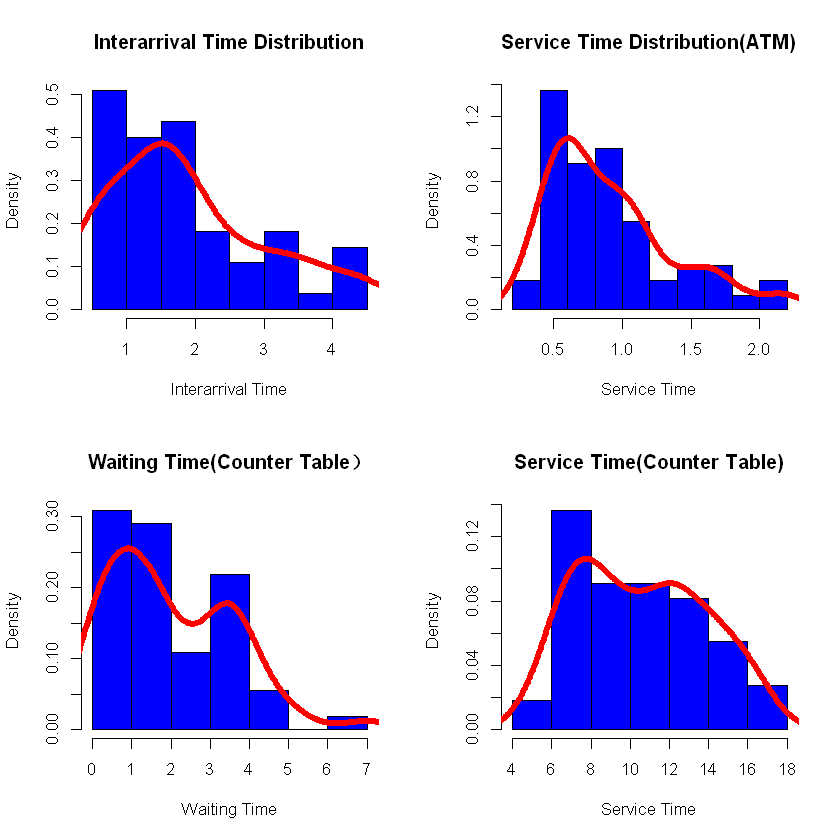

In [114]:
#step3  Data cleaning
replace_with_mean <- function(column) {
  # mean
  mean_value <- mean(column, na.rm = TRUE)
  
  # outliers
  outliers <- which(column < quantile(column, 0.25) - 1.5 * IQR(column) | column > quantile(column, 0.75) + 1.5 * IQR(column))
  
  # replace outliers with the mean
  column[outliers] <- mean_value
  
  return(column)
}

# 对三列数据应用函数
data$Inter.arrival.time.minutes. <- replace_with_mean(data$Inter.arrival.time.minutes.)
data$waiting.time <- replace_with_mean(data$waiting.time)
data$service.time.minutes. <- replace_with_mean(data$service.time.minutes.)
data$waiting.time.for.counter.table <- replace_with_mean(data$waiting.time.for.counter.table)
data$service.time.for.counter.table <- replace_with_mean(data$service.time.for.counter.table)
par(mfrow=c(2,2))
hist(data$Inter.arrival.time.minutes.,freq=FALSE, main = "Interarrival Time Distribution", xlab = "Interarrival Time", col = "blue", border = "black")
lines(density(data$Inter.arrival.time.minutes.), col='red', lwd=5)
hist(data$service.time.minutes.,freq=FALSE, main = "Service Time Distribution(ATM)", xlab = "Service Time", col = "blue", border = "black")
lines(density(data$service.time.minutes.), col='red', lwd=5)
#hist(data$waiting.time, main = "waiting Time Distribution", xlab = "Interarrival Time", col = "blue", border = "black")
hist(data$waiting.time.for.counter.table,freq=FALSE, main = "Waiting Time(Counter Table）", xlab = "Waiting Time", col = "blue", border = "black")
lines(density(data$waiting.time.for.counter.table), col='red', lwd=5)
hist(data$service.time.for.counter.table,freq=FALSE, main = "Service Time(Counter Table)", xlab = "Service Time", col = "blue", border = "black")
lines(density(data$service.time.for.counter.table), col='red', lwd=5)

In [117]:
#step4 Fit distribution  #For each data, choose the distribution having the lowest aic value
fitdist(data$Inter.arrival.time.minutes, 'gamma')$aic
fitdist(data$Inter.arrival.time.minutes, 'norm')$aic
fitdist(data$Inter.arrival.time.minutes, 'exp')$aic
fitdist(data$service.time.minutes., 'gamma')$aic
fitdist(data$service.time.minutes., 'norm')$aic
fitdist(data$service.time.minutes., 'exp')$aic
fitdist(data$waiting.time, 'exp')$aic
fitdist(data$waiting.time, 'norm')$aic
fitdist(data$waiting.time.for.counter.table, 'exp')$aic
fitdist(data$waiting.time.for.counter.table, 'norm')$aic
fitdist(data$waiting.time.for.counter.table, 'gamma')$aic
fitdist(data$service.time.for.counter.table, 'exp')$aic
fitdist(data$service.time.for.counter.table, 'norm')$aic
fitdist(data$service.time.for.counter.table, 'gamma')$aic

[1] 160.1929

[1] 173.1444

[1] 182.4565

[1] 56.98652

[1] 71.90843

[1] 101.75

[1] -368.327

[1] -222.8549

[1] 188.9566

[1] 209.2003

[1] 190.0886

[1] 371.1487

[1] 287.0372

[1] 285.052

In [119]:
#step5 Find parameters
fitdist(data$Inter.arrival.time.minutes, 'gamma')$estimate
fitdist(data$service.time.minutes., 'gamma')$estimate
#fitdist(data$waiting.time, 'exp')$estimate ATM waiting time fixed
fitdist(data$waiting.time.for.counter.table, 'exp')$estimate
fitdist(data$service.time.for.counter.table, 'gamma')$estimate

shape     rate 
2.758905 1.454044

shape     rate 
4.650175 5.104329

rate 
0.4967812

shape      rate 
10.763268  1.020473

In [ ]:
hist(data$Inter.arrival.time.minutes., main = "Interarrival Time Distribution", xlab = "Interarrival Time", col = "blue", border = "black")
hist(data$service.time.minutes., main = "service Time Distribution", xlab = "Interarrival Time", col = "blue", border = "black")
hist(data$waiting.time.for.counter.table, main = "waiting.time.for.counter.table", xlab = "Interarrival Time", col = "blue", border = "black")
hist(data$service.time.for.counter.table, main = "service.time.for.counter.table", xlab = "Interarrival Time", col = "blue", border = "black")
fitdist(data$Inter.arrival.time.minutes, 'exp')$estimate
fitdist(data$service.time.minutes., 'gamma')$estimate
fitdist(data$waiting.time.for.counter.table, 'exp')$estimate
fitdist(data$service.time.for.counter.table, 'gamma')$estimate


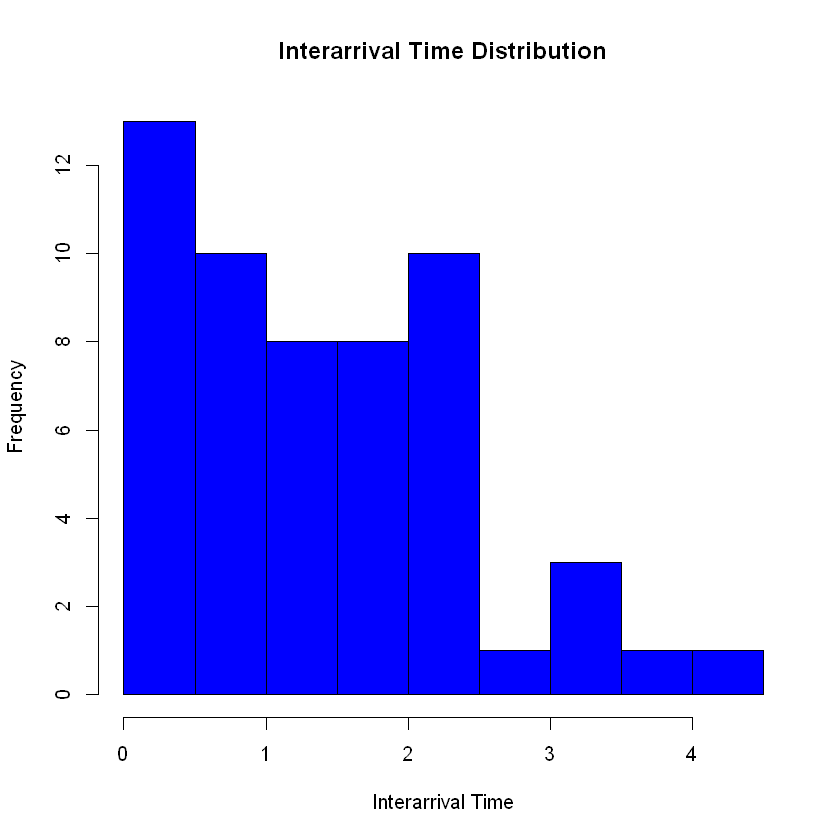

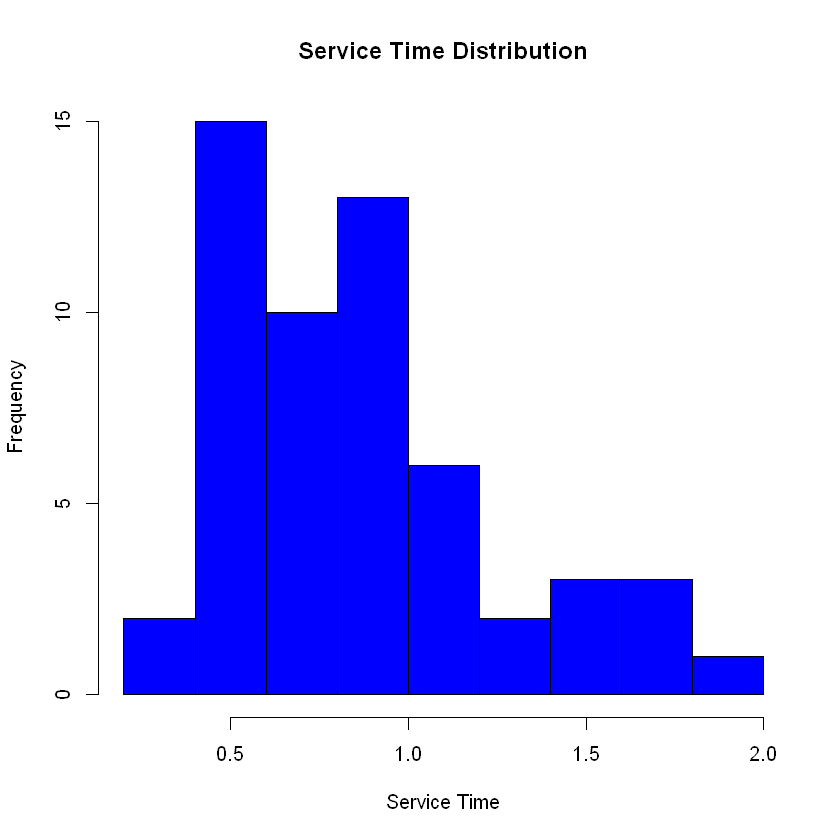

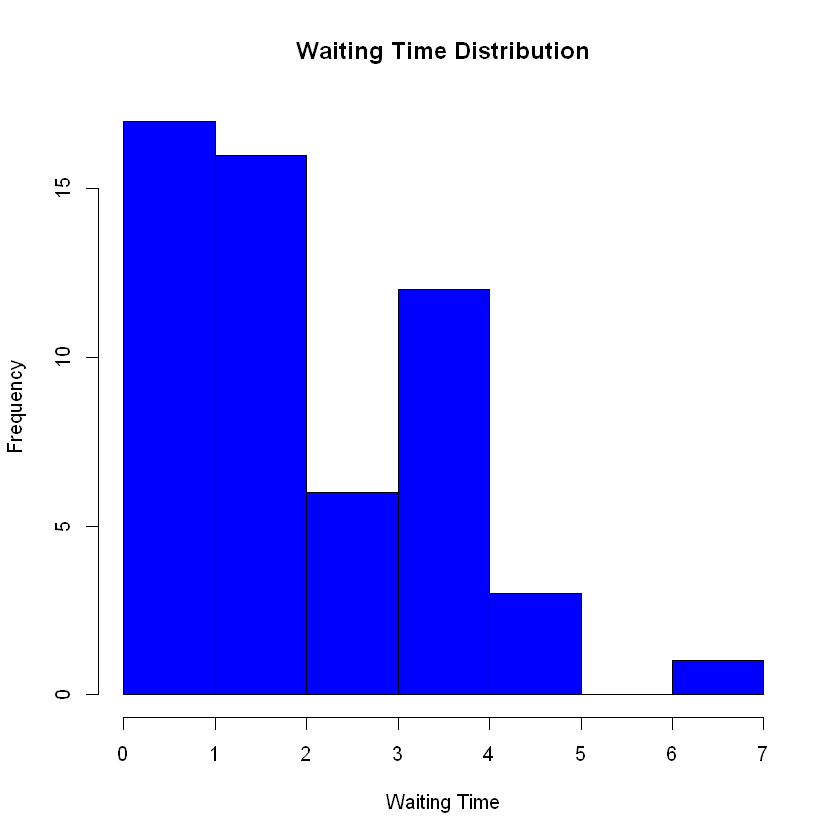

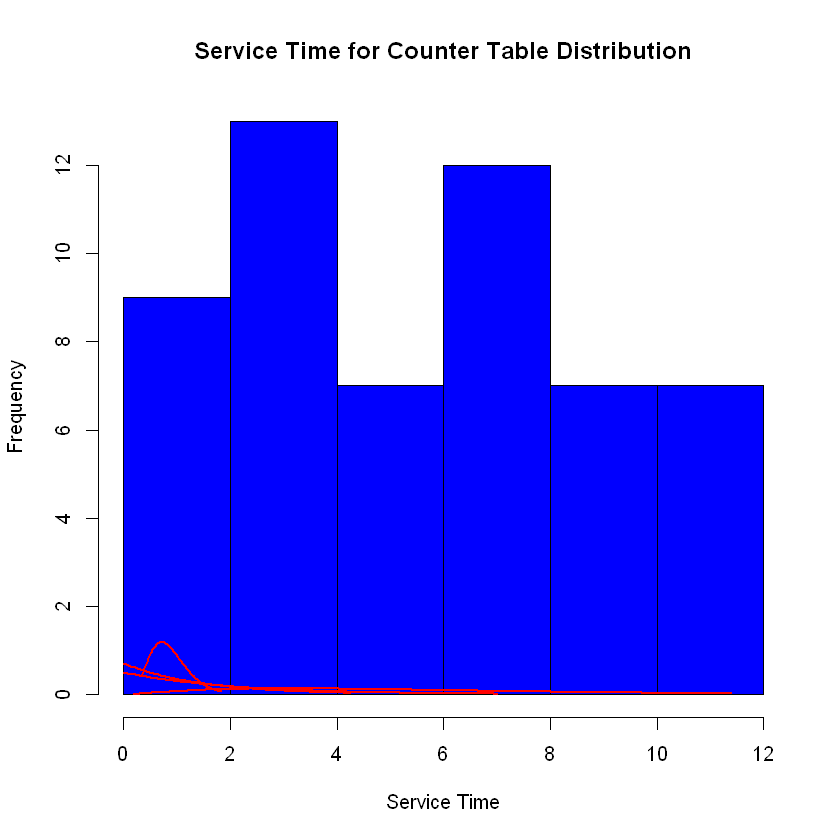

In [18]:
# Fit distributions
inter_arrival_fit <- fitdist(data$Inter.arrival.time.minutes, 'exp')
service_time_fit <- fitdist(data$service.time.minutes., 'gamma')
waiting_time_fit <- fitdist(data$waiting.time.for.counter.table, 'exp')
service_time_counter_fit <- fitdist(data$service.time.for.counter.table, 'gamma')

# Plot histograms
hist(data$Inter.arrival.time.minutes., main = "Interarrival Time Distribution", xlab = "Interarrival Time", col = "blue", border = "black")
hist(data$service.time.minutes., main = "Service Time Distribution", xlab = "Service Time", col = "blue", border = "black")
hist(data$waiting.time.for.counter.table, main = "Waiting Time Distribution", xlab = "Waiting Time", col = "blue", border = "black")
hist(data$service.time.for.counter.table, main = "Service Time for Counter Table Distribution", xlab = "Service Time", col = "blue", border = "black")

# Add fitted distribution curves
x_values <- seq(min(data$Inter.arrival.time.minutes), max(data$Inter.arrival.time.minutes), length.out = 100)
lines(x_values, dexp(x_values, rate = inter_arrival_fit$estimate[["rate"]]), col = "red", lwd = 2)

x_values <- seq(min(data$service.time.minutes.), max(data$service.time.minutes.), length.out = 100)
lines(x_values, dgamma(x_values, shape = service_time_fit$estimate[["shape"]], rate = service_time_fit$estimate[["rate"]]), col = "red", lwd = 2)

x_values <- seq(min(data$waiting.time.for.counter.table), max(data$waiting.time.for.counter.table), length.out = 100)
lines(x_values, dexp(x_values, rate = waiting_time_fit$estimate[["rate"]]), col = "red", lwd = 2)

x_values <- seq(min(data$service.time.for.counter.table), max(data$service.time.for.counter.table), length.out = 100)
lines(x_values, dgamma(x_values, shape = service_time_counter_fit$estimate[["shape"]], rate = service_time_counter_fit$estimate[["rate"]]), col = "red", lwd = 2)

In [19]:
# 归一化函数
normalize <- function(x) {
  return((x - min(x)) / (max(x) - min(x)))
}

# 对数据进行归一化
normalized_data <- data.frame(
  Inter.arrival.time.minutes. = normalize(data$Inter.arrival.time.minutes.),
  waiting.time = normalize(data$waiting.time),
  service.time.minutes. = normalize(data$service.time.minutes.),
  waiting.time.for.counter.table = normalize(data$waiting.time.for.counter.table),
  service.time.for.counter.table = normalize(data$service.time.for.counter.table)
)

# Fit distributions
inter_arrival_fit <- fitdist(normalized_data$Inter.arrival.time.minutes., 'exp')
service_time_fit <- fitdist(normalized_data$service.time.minutes., 'gamma')
waiting_time_fit <- fitdist(normalized_data$waiting.time.for.counter.table, 'exp')
service_time_counter_fit <- fitdist(normalized_data$service.time.for.counter.table, 'gamma')

# Plot histograms
hist(normalized_data$Inter.arrival.time.minutes., main = "Interarrival Time Distribution", xlab = "Interarrival Time", col = "blue", border = "black")
hist(normalized_data$service.time.minutes., main = "Service Time Distribution", xlab = "Service Time", col = "blue", border = "black")
hist(normalized_data$waiting.time.for.counter.table, main = "Waiting Time Distribution", xlab = "Waiting Time", col = "blue", border = "black")
hist(normalized_data$service.time.for.counter.table, main = "Service Time for Counter Table Distribution", xlab = "Service Time", col = "blue", border = "black")

# Add fitted distribution curves
x_values <- seq(min(normalized_data$Inter.arrival.time.minutes.), max(normalized_data$Inter.arrival.time.minutes.), length.out = 100)
lines(x_values, dexp(x_values, rate = inter_arrival_fit$estimate[["rate"]]), col = "red", lwd = 2)

x_values <- seq(min(normalized_data$service.time.minutes.), max(normalized_data$service.time.minutes.), length.out = 100)
lines(x_values, dgamma(x_values, shape = service_time_fit$estimate[["shape"]], rate = service_time_fit$estimate[["rate"]]), col = "red", lwd = 2)

x_values <- seq(min(normalized_data$waiting.time.for.counter.table), max(normalized_data$waiting.time.for.counter.table), length.out = 100)
lines(x_values, dexp(x_values, rate = waiting_time_fit$estimate[["rate"]]), col = "red", lwd = 2)

x_values <- seq(min(normalized_data$service.time.for.counter.table), max(normalized_data$service.time.for.counter.table), length.out = 100)
lines(x_values, dgamma(x_values, shape = service_time_counter_fit$estimate[["shape"]], rate = service_time_counter_fit$estimate[["rate"]]), col = "red", lwd = 2)

<simpleError in optim(par = vstart, fn = fnobj, fix.arg = fix.arg, obs = data,     gr = gradient, ddistnam = ddistname, hessian = TRUE, method = meth,     lower = lower, upper = upper, ...): 无法用初始参数来评估函数>


ERROR: Error in fitdist(normalized_data$service.time.minutes., "gamma"): the function mle failed to estimate the parameters, 
                with the error code 100



In [20]:
# AIC values for different distributions
aic_values <- c(
  fitdist(data$Inter.arrival.time.minutes, 'norm')$aic,
  fitdist(data$Inter.arrival.time.minutes, 'exp')$aic,
  fitdist(data$service.time.minutes., 'gamma')$aic,
  fitdist(data$service.time.minutes., 'norm')$aic,
  fitdist(data$service.time.minutes., 'exp')$aic,
  fitdist(data$waiting.time, 'exp')$aic,
  fitdist(data$waiting.time, 'norm')$aic,
  fitdist(data$waiting.time.for.counter.table, 'exp')$aic,
  fitdist(data$waiting.time.for.counter.table, 'norm')$aic,
  fitdist(data$service.time.for.counter.table, 'exp')$aic,
  fitdist(data$service.time.for.counter.table, 'norm')$aic,
  fitdist(data$service.time.for.counter.table, 'gamma')$aic
)

# Create a data frame
distribution_table <- data.frame(
  Distribution = c(
    "Normal (Inter-arrival time)",
    "Exponential (Inter-arrival time)",
    "Gamma (Service time)",
    "Normal (Service time)",
    "Exponential (Service time)",
    "Exponential (Waiting time)",
    "Normal (Waiting time)",
    "Exponential (Waiting time for counter)",
    "Normal (Waiting time for counter)",
    "Exponential (Service time for counter)",
    "Normal (Service time for counter)",
    "Gamma (Service time for counter)"
  ),
  AIC_Value = aic_values
)

# Print the table
print(distribution_table)

<simpleError in optim(par = vstart, fn = fnobj, fix.arg = fix.arg, obs = data,     gr = gradient, ddistnam = ddistname, hessian = TRUE, method = meth,     lower = lower, upper = upper, ...): non-finite finite-difference value [2]>


ERROR: Error in fitdist(data$waiting.time, "norm"): the function mle failed to estimate the parameters, 
                with the error code 100



In [29]:
# AIC values for different distributions
aic_values <- c(
  fitdist(data$Inter.arrival.time.minutes, 'norm')$aic,
  fitdist(data$Inter.arrival.time.minutes, 'exp')$aic,
  fitdist(data$service.time.minutes., 'gamma')$aic,
  fitdist(data$service.time.minutes., 'norm')$aic,
  fitdist(data$service.time.minutes., 'exp')$aic,
  fitdist(data$waiting.time, 'exp')$aic,
  fitdist(data$waiting.time, 'norm')$aic,
  fitdist(data$waiting.time.for.counter.table, 'exp')$aic,
  fitdist(data$waiting.time.for.counter.table, 'norm')$aic,
  fitdist(data$service.time.for.counter.table, 'exp')$aic,
  fitdist(data$service.time.for.counter.table, 'norm')$aic,
  fitdist(data$service.time.for.counter.table, 'gamma')$aic
)

# Create a data frame
distribution_table <- data.frame(
  Distribution = c(
    "Normal (Inter-arrival time)",
    "Exponential (Inter-arrival time)",
    "Gamma (Service time)",
    "Normal (Service time)",
    "Exponential (Service time)",
    "Exponential (Waiting time)",
    "Normal (Waiting time)",
    "Exponential (Waiting time for counter)",
    "Normal (Waiting time for counter)",
    "Exponential (Service time for counter)",
    "Normal (Service time for counter)",
    "Gamma (Service time for counter)"
  ),
  AIC_Value = aic_values
)

# Print the table
print(distribution_table)

                             Distribution  AIC_Value
1             Normal (Inter-arrival time)  165.98220
2        Exponential (Inter-arrival time)  150.46875
3                    Gamma (Service time)   42.27494
4                   Normal (Service time)   52.54221
5              Exponential (Service time)   96.07861
6              Exponential (Waiting time) -580.39506
7                   Normal (Waiting time) -434.92299
8  Exponential (Waiting time for counter)  188.15706
9       Normal (Waiting time for counter)  210.09237
10 Exponential (Service time for counter)  300.47006
11      Normal (Service time for counter)  287.03719
12       Gamma (Service time for counter)  285.91278


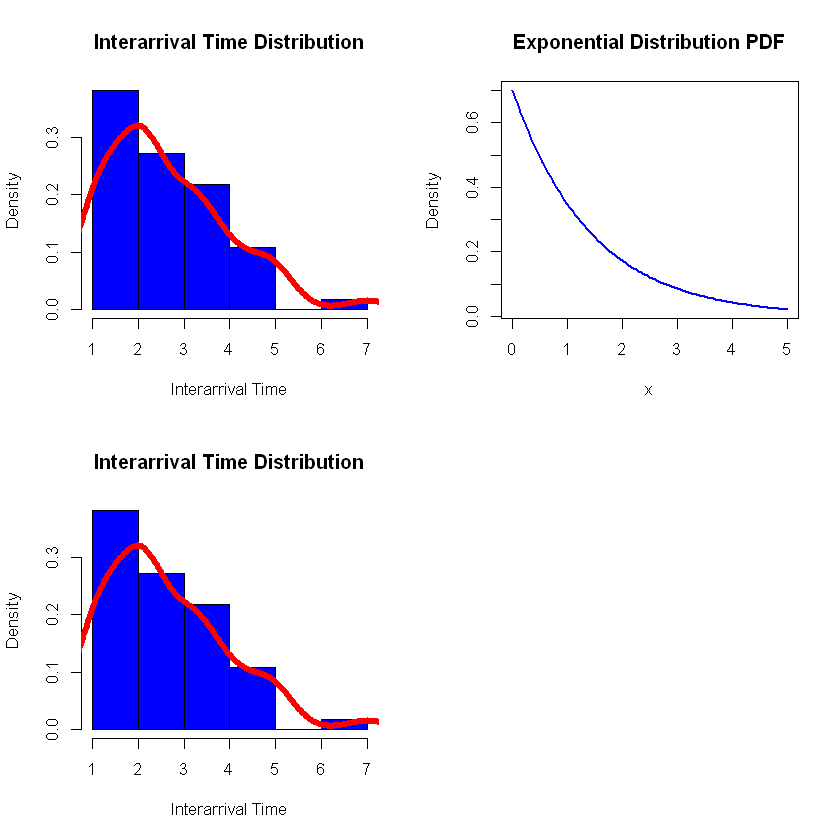

In [59]:
# hist(data$Inter.arrival.time.minutes., main = "Interarrival Time Distribution", xlab = "Interarrival Time", col = "blue", border = "black")
# hist(data$service.time.minutes., main = "service Time Distribution", xlab = "Interarrival Time", col = "blue", border = "black")
# #hist(data$waiting.time, main = "waiting Time Distribution", xlab = "Interarrival Time", col = "blue", border = "black")
# hist(data$waiting.time.for.counter.table, main = "waiting.time.for.counter.table", xlab = "Interarrival Time", col = "blue", border = "black")
# hist(data$service.time.for.counter.table, main = "service.time.for.counter.table", xlab = "Interarrival Time", col = "blue", border = "black")
x <- seq(0,8,0.01)
par(mfrow=c(2,2))
hist(data$Inter.arrival.time.minutes.,freq=FALSE, main = "Interarrival Time Distribution", xlab = "Interarrival Time", col = "blue", border = "black")
lines(density(data$Inter.arrival.time.minutes.), col='red', lwd=5)
exponential_pdf <- function(x, lambda) {
  lambda * exp(-lambda * x)
}

# 设置速率参数
lambda <- 0.7

# 绘制指数分布的概率密度函数
curve(exponential_pdf(x, lambda), from = 0, to = 5, col = "blue", lwd = 2,
      main = "Exponential Distribution PDF", xlab = "x", ylab = "Density")
hist(data$Inter.arrival.time.minutes.,freq=FALSE, main = "Interarrival Time Distribution", xlab = "Interarrival Time", col = "blue", border = "black")
lines(density(data$Inter.arrival.time.minutes.), col='red', lwd=5)

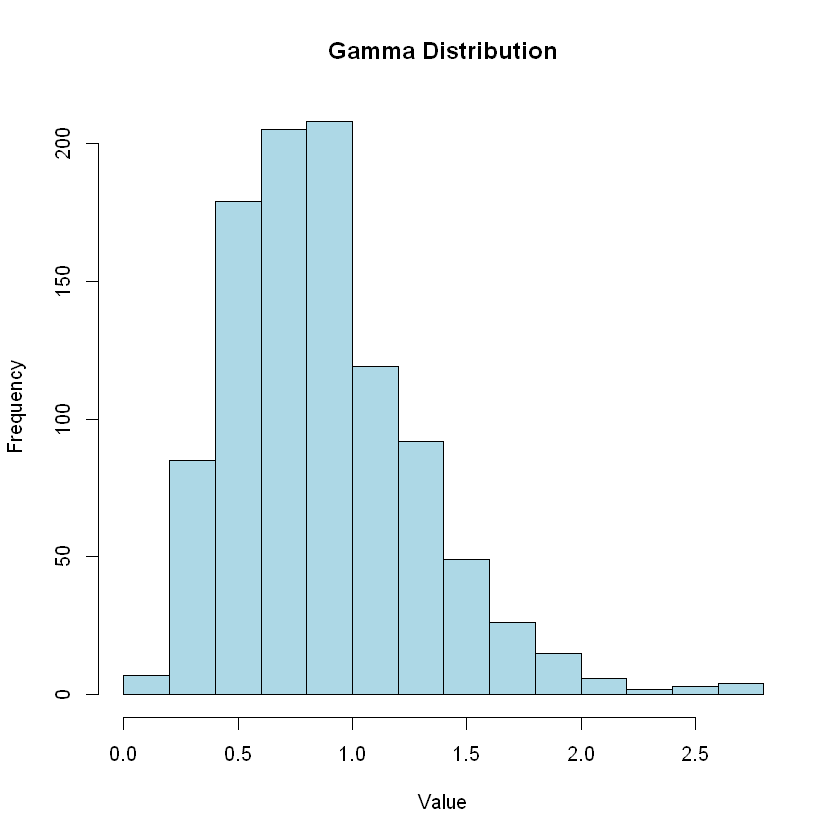

In [120]:
# 设置随机数种子，以确保结果可重复
set.seed(123)

# 指定Gamma分布的形状和速率参数
shape_parameter <- 4.65017499974226
rate_parameter <- 5.10432946489311

# 生成Gamma分布的随机样本
gamma_samples <- rgamma(1000, shape = shape_parameter, rate = rate_parameter)

# 绘制直方图
hist(gamma_samples, main = "Gamma Distribution",
     xlab = "Value", ylab = "Frequency",
     col = "lightblue", border = "black")